IMPORTING OUR DEPENDANCIES

In [1]:
# importing necessary libraries for our project
import os
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

ACCESSING A PICTURE FROM OUR DATA AND VISUALIZING IT

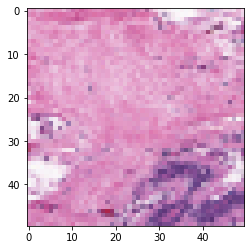

In [2]:
data_dir = 'BreastCancer/train/'

categories = os.listdir(data_dir)

for category in categories:
    path = os.path.join(data_dir, category)
    for image in os.listdir(path):
        img = cv.imread(os.path.join(path, image))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        break
    break

CREATING OUR TRAINING DATA

In [3]:
# train data directory where our training data is found

train_data_dir = 'BreastCancer/train/'

train_categories = os.listdir(train_data_dir)

train_categories # train categories reveals how many classes we have in our training data

['Benign', 'Malignant']

In [4]:
# creating an empty list for storing our training data

train_data = []

# defining a function to collect data from our training folder

def get_train_data():
    for category in train_categories:
        path = os.path.join(train_data_dir, category)
        class_num = train_categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (50, 50))
            train_data.append([img, class_num])

In [5]:
# calling our function to collect data

get_train_data()

In [6]:
# printing number of images in our train data

len(train_data)

10000

In [7]:
# shuffling our training data

random.shuffle(train_data)

In [8]:
# checking to see if our data has been shuffled

for i in train_data[:10]:
    print(i[1])

1
1
1
0
0
0
0
0
0
1


In [9]:
# getting our features and labels from our train data

X_train = []
y_train = []

for data in train_data:
    features = data[0]
    labels = data[1]

    X_train.append(features)
    y_train.append(labels)

In [10]:
# converting our X_train and y_train from lists to integer arrays using numpy
X_train = np.array(X_train, dtype='int32')/255
y_train = np.array(y_train)

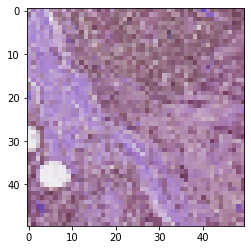

In [11]:
# visualizing an image from our X_train

plt.imshow(X_train[0])
plt.show()

In [12]:
# getting the label for the visualized image. 0 represent Benign and 1 represents Malignant

y_train[0]

1

CREATING OUR TESTING DATA

In [13]:
# testing data directory where our testing data is located

test_data_dir = 'BreastCancer/test/'

test_categories = os.listdir(test_data_dir)

test_categories # train categories represent the labels of our images

['Benign', 'Malignant']

In [14]:
# creating an empty list for storing our test data

test_data = []

# defining a function to load our test images
def get_test_data():
    for category in test_categories:
        path = os.path.join(test_data_dir, category)
        class_num = test_categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (50, 50))
            test_data.append([img, class_num])

In [15]:
# calling our function to load our test data

get_test_data()

In [16]:
# printing the number of images found in our test data

len(test_data)

2000

In [17]:
# shuffling our test data for better results

random.shuffle(test_data)

In [18]:
# creating empty lists for collecting our X_test and our y_test

X_test = []
y_test = []

for data in test_data:
    features = data[0]
    labels = data[1]

    X_test.append(features)
    y_test.append(labels)

In [19]:
# converting our X_test and y_test from lists to integer arrays

X_test = np.array(X_test, dtype='int32')/255 # dividing pixel values by 255 for normalization purposes
y_test = np.array(y_test)

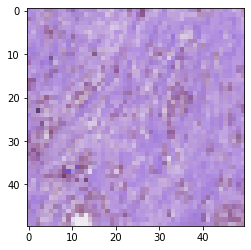

In [20]:
# visualizing an image from our test data

plt.imshow(X_test[0])
plt.show()

In [21]:
# getting the label of our visualized image

y_test[0]

0

CREATING OUR VALIDATION DATA

In [22]:
val_data_dir = 'BreastCancer/valid/'

val_categories = os.listdir(val_data_dir)

val_categories

['Benign', 'Malignant']

In [23]:
# defining an empty list to store our validation data

val_data = []

# defining a function to collect validation data

def get_val_data():
    for category in val_categories:
        path = os.path.join(val_data_dir, category)
        class_num = val_categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (50, 50))
            val_data.append([img, class_num])

In [24]:
# calling the function to collect our validation data

get_val_data()

In [25]:
# printing the number of validation images found in our validation data

len(val_data)

2000

In [26]:
# randomly shuffling our validation data for better results

random.shuffle(val_data)

In [27]:
# making an empty list to collect our validation images and labels

X_val = []
y_val = []

for data in val_data:
    features = data[0]
    labels = data[1]

    X_val.append(features)
    y_val.append(labels)

In [28]:
# converting our X_val and y_val from lists to integer arrays using numpy

X_val = np.array(X_val, dtype='int32')/255
y_val = np.array(y_val)

In [29]:
# defining our model

model = Sequential()

In [30]:
# defining the architecture of our model(number of layers, neurons, type of activation function)

model.add(Conv2D(16, (3,3), input_shape = (50, 50, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [31]:
# compiling our model before training

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# training our model and putting all the model training data in a variable 'hist' for visualization

hist = model.fit(X_train, y_train, batch_size=10, epochs=5, validation_data=(X_val, y_val), validation_batch_size=10)

Epoch 1/5
1000/1000 [==============================] - 118s 111ms/step - loss: 0.6873 - accuracy: 0.5376 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.6210 - accuracy: 0.6591 - val_loss: 0.5890 - val_accuracy: 0.7160
Epoch 3/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.5670 - accuracy: 0.7229 - val_loss: 0.5200 - val_accuracy: 0.7600
Epoch 4/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.5376 - accuracy: 0.7418 - val_loss: 0.5481 - val_accuracy: 0.7220
Epoch 5/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.5214 - accuracy: 0.7561 - val_loss: 0.5002 - val_accuracy: 0.7740


In [33]:
# evaluating how our model performed on validation data

model.evaluate(X_val, y_val)

63/63 [==============================] - 7s 101ms/step - loss: 0.5002 - accuracy: 0.7740


[0.5001567006111145, 0.7739999890327454]

In [34]:
# evaluating how our model performed on test data

model.evaluate(X_test, y_test)

63/63 [==============================] - 6s 97ms/step - loss: 0.5029 - accuracy: 0.7815


[0.502877414226532, 0.781499981880188]

In [35]:
# evaluating how our model performed on training data

model.evaluate(X_train, y_train)

313/313 [==============================] - 25s 79ms/step - loss: 0.5006 - accuracy: 0.7766


[0.5006122589111328, 0.7766000032424927]

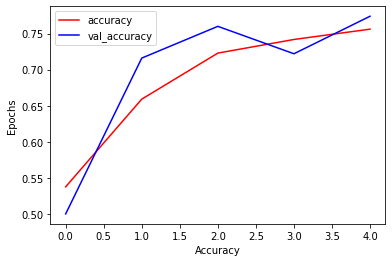

In [36]:
# making a plot to visualize the accuracy of our model as it trained

plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()

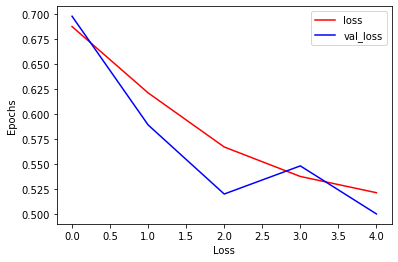

In [37]:
# making a plot to visualize the loss of our model as it trained

plt.plot(hist.history['loss'], label='loss', color='red')
plt.plot(hist.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [38]:
# saving our model after training

model.save('BCmodel.h5')

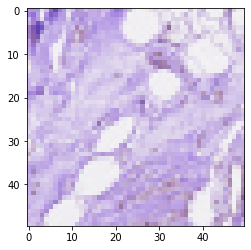

'Benign'

In [40]:
# taking a rahndom image from our test folder to see if the model makes a correct prediction

test_image = cv.imread('BreastCancer/test/Benign/9123_idx5_x3151_y1651_class0.png')
img = cv.resize(test_image, (50, 50))

plt.imshow(img)
plt.show()


pred = model.predict(np.expand_dims(img/255, axis=0))
pred = np.argmax(pred)
pred = train_categories[pred]
pred